In [2]:
import MDAnalysis as mda
import mdtraj as md
import signac
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from CPManalysis.charge_dist import charge_dist
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
project = signac.get_project()

b5b4492aaf32d906ba0e6f5c70f7fa3c acn_emimtfsi


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


b5b4492aaf32d906ba0e6f5c70f7fa3c acn_emimtfsi


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


ed495a8abc35b20dfd52015a10ad4862 neat_emimtfsi


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


ed495a8abc35b20dfd52015a10ad4862 neat_emimtfsi


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


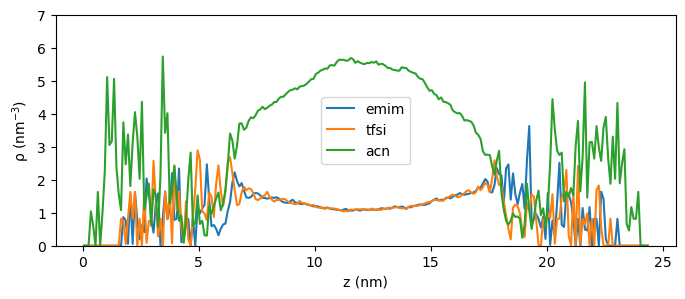

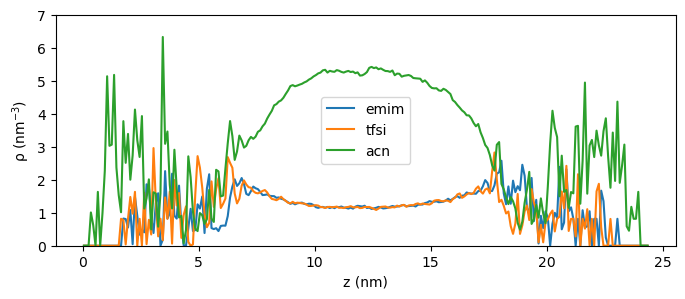

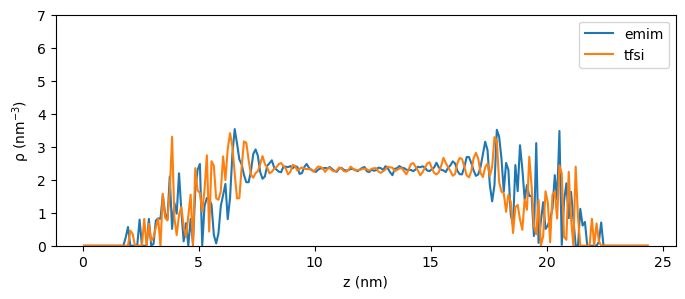

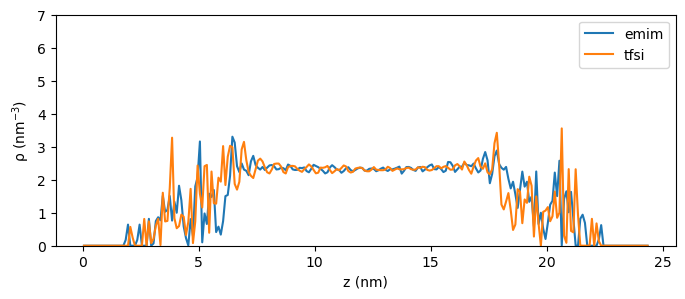

In [15]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary

cases, seed, voltage = ['acn_emimtfsi', 'neat_emimtfsi'], 0, 3

for case in cases:
    for range_ in [4000, [0, 4000]]:
        fig, ax = plt.subplots(figsize=(8,3))
        for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
            print(job.id, case)
            
            
            trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
            gro_file = os.path.join(job.workspace(), "com.gro")
            trj_total = md.load(trj_file,top = gro_file)
            if case == 'acn_litfsi' or case == 'wat_litfsi':
                
                res_name_list = ['li', 'tfsi']
            else:
                if case == 'neat_emimtfsi':
                    res_name_list = ['emim', 'tfsi']
                elif case == 'acn_emimtfsi':
                    res_name_list = ['emim', 'tfsi', 'acn']
                
            for res_name in res_name_list:
                new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=range_, res_name = res_name, binwidth = 0.1)
                x = new_bins
                y = new_hist
                ax.plot(x, y, label = res_name)
                ax.legend()
                ax.set_xlabel('z (nm)')
                ax.set_ylim(0, 7)
                ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))
        
        

d5250e43e6a0688a3401eee449e94ca6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d5250e43e6a0688a3401eee449e94ca6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


09ad58e59a07dcc17e8c7a71ca799edc


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


09ad58e59a07dcc17e8c7a71ca799edc


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


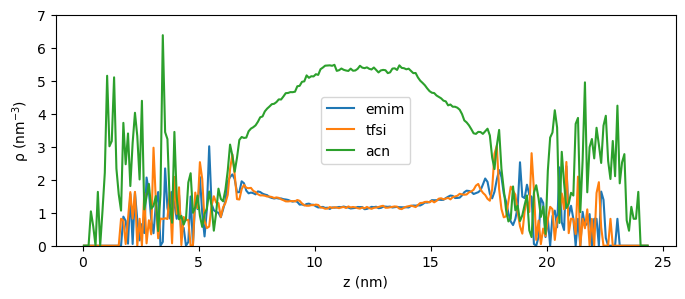

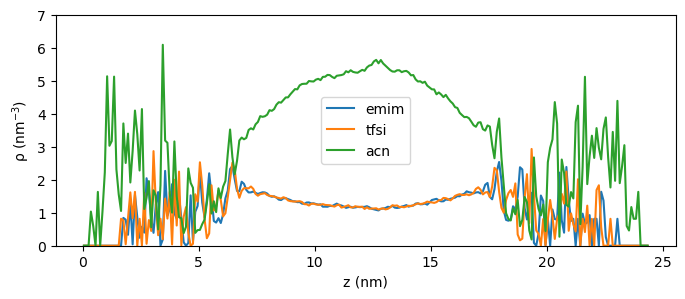

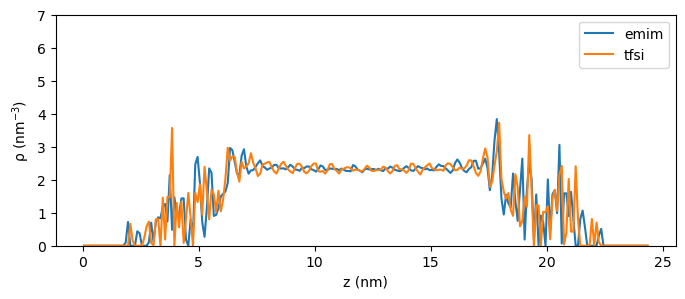

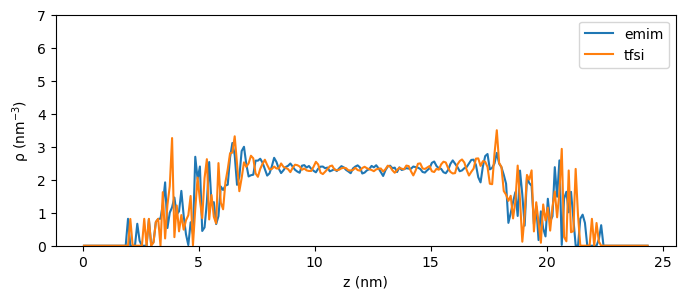

In [14]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary

cases, seed, voltage = ['acn_emimtfsi', 'neat_emimtfsi'], 0, 0

for case in cases:
    for range_ in [4000, [0, 4000]]:
        fig, ax = plt.subplots(figsize=(8,3))
        for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
            print(job.id)
            trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
            gro_file = os.path.join(job.workspace(), "com.gro")
            trj_total = md.load(trj_file,top = gro_file)
            if case == 'acn_litfsi' or case == 'wat_litfsi':
                
                res_name_list = ['li', 'tfsi']
            else:
                if case == 'neat_emimtfsi':
                    res_name_list = ['emim', 'tfsi']
                elif case == 'acn_emimtfsi':
                    res_name_list = ['emim', 'tfsi', 'acn']
                
            for res_name in res_name_list:
                new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=range_, res_name = res_name, binwidth = 0.1)
                x = new_bins
                y = new_hist
                ax.plot(x, y, label = res_name)
                ax.legend()
                ax.set_xlabel('z (nm)')
                ax.set_ylim(0, 7)
                ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

ed495a8abc35b20dfd52015a10ad4862


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


ed495a8abc35b20dfd52015a10ad4862


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


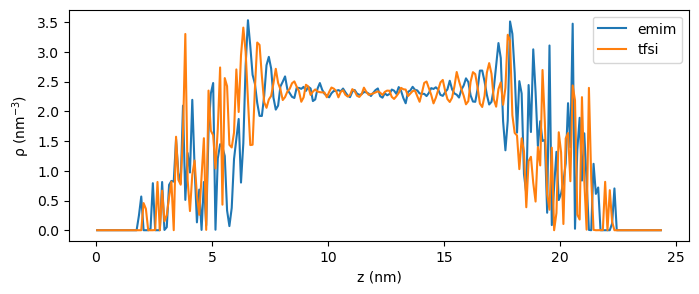

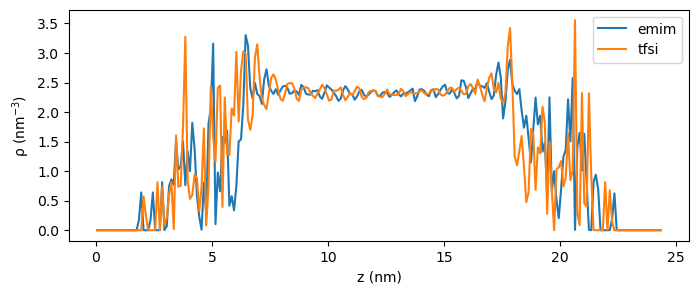

In [11]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary

case, seed, voltage = 'neat_emimtfsi', 0, 3

for range_ in [4000, [0, 4000]]:
    fig, ax = plt.subplots(figsize=(8,3))
    for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
        print(job.id)
        trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
        gro_file = os.path.join(job.workspace(), "com.gro")
        trj_total = md.load(trj_file,top = gro_file)
        if case == 'acn_litfsi' or case == 'wat_litfsi':
            
            res_name_list = ['li', 'tfsi']
        else:
            if case == 'neat_emimtfsi':
                res_name_list = ['emim', 'tfsi']
            elif case == 'acn_emimtfsi':
                res_name_list = ['emim', 'tfsi', 'acn']
            
        for res_name in res_name_list:
            new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=range_, res_name = res_name, binwidth = 0.1)
            x = new_bins
            y = new_hist
            ax.plot(x, y, label = res_name)
            ax.legend()
            ax.set_xlabel('z (nm)')
            ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

ed495a8abc35b20dfd52015a10ad4862


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


b5b4492aaf32d906ba0e6f5c70f7fa3c


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d9151b69fd4d92f7fa9604b3842a2b5e


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


75503cebb8049b4408d26827bc92cc0a


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (wat, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, wat)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


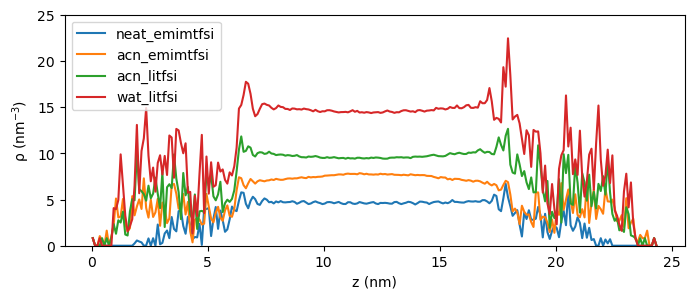

In [7]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
fig, ax = plt.subplots(figsize=(8,3))
cases = ['neat_emimtfsi','acn_emimtfsi','acn_litfsi', 'wat_litfsi']
seed, voltage =  0, 3

for case in cases:
    for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
        print(job.id)
        trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
        gro_file = os.path.join(job.workspace(), "com.gro")
        trj_total = md.load(trj_file,top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=4000, res_name = 'all', binwidth = 0.1)
        
        
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = case)
    
        ax.legend()
        ax.set_ylim(0, 25)
        ax.set_xlabel('z (nm)')
        ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

ed495a8abc35b20dfd52015a10ad4862


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


b5b4492aaf32d906ba0e6f5c70f7fa3c


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d9151b69fd4d92f7fa9604b3842a2b5e


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


75503cebb8049b4408d26827bc92cc0a


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (wat, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, wat)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


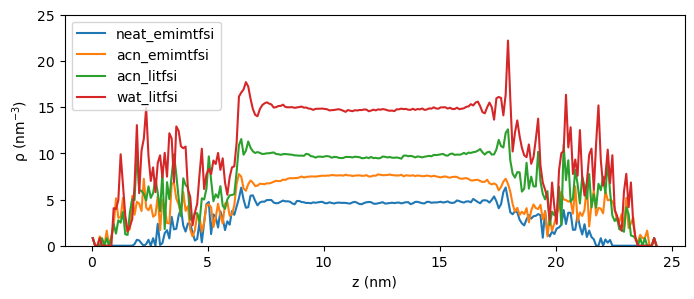

In [8]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
fig, ax = plt.subplots(figsize=(8,3))
cases = ['neat_emimtfsi','acn_emimtfsi','acn_litfsi', 'wat_litfsi']
seed, voltage =  0, 3

for case in cases:
    for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
        print(job.id)
        trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
        gro_file = os.path.join(job.workspace(), "com.gro")
        trj_total = md.load(trj_file,top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=[0,4000], res_name = 'all', binwidth = 0.1)
        
        
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = case)
    
        ax.legend()
        ax.set_ylim(0, 25)
        ax.set_xlabel('z (nm)')
        ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

09ad58e59a07dcc17e8c7a71ca799edc


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d5250e43e6a0688a3401eee449e94ca6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


11f11fc34adccb9fa097569f601a391a


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d74ae4d4bc2d8b1bfa629edda93d48d3


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (wat, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, wat)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


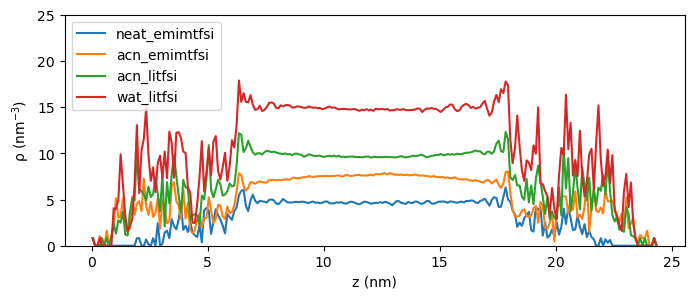

In [6]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
fig, ax = plt.subplots(figsize=(8,3))
cases = ['neat_emimtfsi','acn_emimtfsi','acn_litfsi', 'wat_litfsi']
seed, voltage =  0, 0


for case in cases:
    for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
        print(job.id)
        trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
        gro_file = os.path.join(job.workspace(), "com.gro")
        trj_total = md.load(trj_file,top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=[0,4000], res_name = 'all', binwidth = 0.1)
        
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = case)
    
        ax.legend()
        ax.set_ylim(0, 25)
        ax.set_xlabel('z (nm)')
        ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

09ad58e59a07dcc17e8c7a71ca799edc


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d5250e43e6a0688a3401eee449e94ca6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


11f11fc34adccb9fa097569f601a391a


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


d74ae4d4bc2d8b1bfa629edda93d48d3


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (wat, cdc)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (li, wat)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, li)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


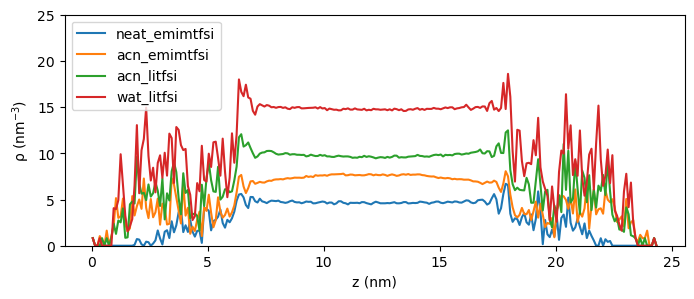

In [5]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
fig, ax = plt.subplots(figsize=(8,3))
cases = ['neat_emimtfsi','acn_emimtfsi','acn_litfsi', 'wat_litfsi']
seed, voltage =  0, 0


for case in cases:
    for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
        print(job.id)
        trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
        gro_file = os.path.join(job.workspace(), "com.gro")
        trj_total = md.load(trj_file,top = gro_file)
        new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=4000, res_name = 'all', binwidth = 0.1)
        
        x = new_bins
        y = new_hist
        ax.plot(x, y, label = case)
    
        ax.legend()
        ax.set_xlabel('z (nm)')
        ax.set_ylim(0, 25)
        ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

In [ ]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary
fig, ax = plt.subplots(figsize=(8,3))
case, seed, voltage = 'acn_emimtfsi', 0, 3
for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
    print(job.id)
    trj_file = os.path.join(job.workspace(), "sample_com_unwrapped.xtc")
    gro_file = os.path.join(job.workspace(), "com.gro")
    trj_total = md.load(trj_file,top = gro_file)
    new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=4000, res_name = 'all', binwidth = 0.1)
    x = new_bins
    y = new_hist
    ax.plot(x, y, label = 'all')

    ax.legend()
    ax.set_xlabel('z (nm)')
    ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

bfda7ca43d6f61270dcb04ca257527ae


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


bfda7ca43d6f61270dcb04ca257527ae


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


3e1ccf3c95b68f26d059e8046832db49


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


3e1ccf3c95b68f26d059e8046832db49


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


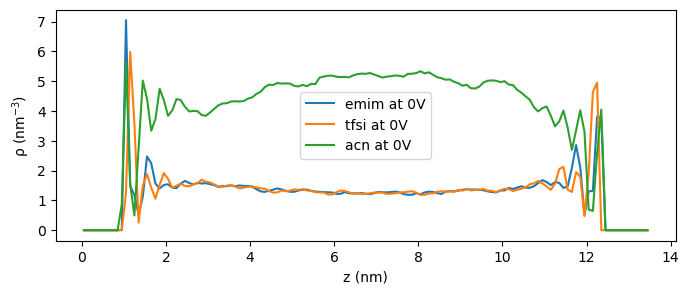

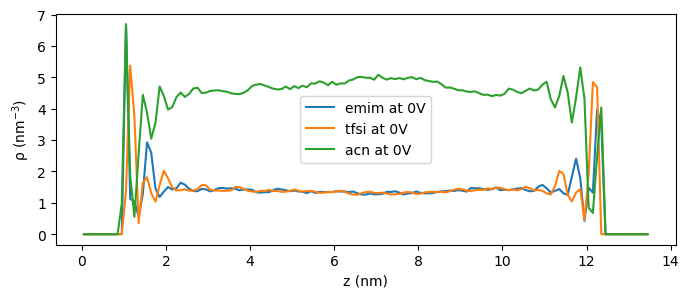

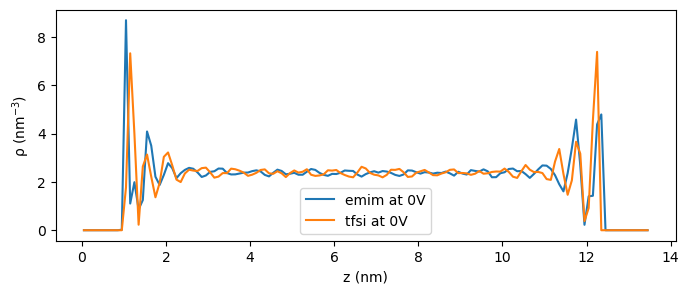

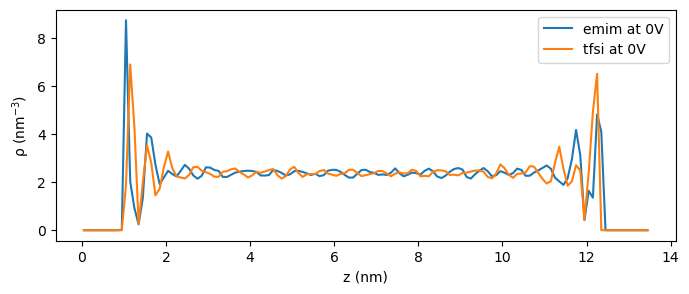

In [10]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary

cases, seed, voltage = ['acn_emimtfsi', 'neat_emimtfsi'], 3, 0
for case in cases:
    for range_ in [4000, [0, 4000]]:
        fig, ax = plt.subplots(figsize=(8,3))
        for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
            print(job.id)
            trj_file = os.path.join(job.workspace(), "plane_sample_com_unwrapped.xtc")
            gro_file = os.path.join(job.workspace(), "plane_com.gro")
            trj_total = md.load(trj_file,top = gro_file)
            if case == 'acn_litfsi' or case == 'wat_litfsi':
                
                res_name_list = ['li', 'tfsi']
            else:
                if case == 'neat_emimtfsi':
                    res_name_list = ['emim', 'tfsi']
                elif case == 'acn_emimtfsi':
                    res_name_list = ['emim', 'tfsi', 'acn']
                
            for res_name in res_name_list:
                new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=range_, res_name = res_name, binwidth = 0.1)
                x = new_bins
                y = new_hist
                ax.plot(x, y, label = "{} at {}V".format(res_name, voltage))
                ax.legend()
                ax.set_xlabel('z (nm)')
                ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))

6159b48c31cc80881b047d79feb31bb6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


6159b48c31cc80881b047d79feb31bb6


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (acn, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, acn)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


4ac1bd4c7366a76190efd348d33de45c


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


4ac1bd4c7366a76190efd348d33de45c


/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (emim, gra)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/global/homes/l/linx6/.conda/envs/myenv/lib/python3.7/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (tfsi, emim)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


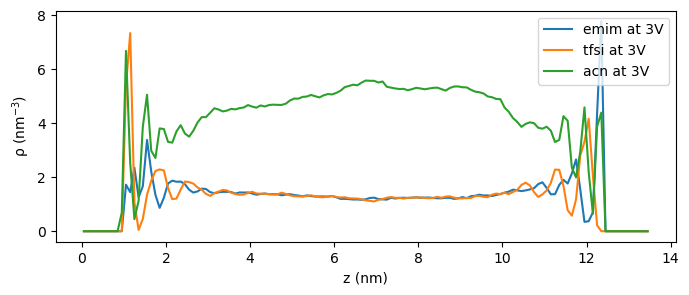

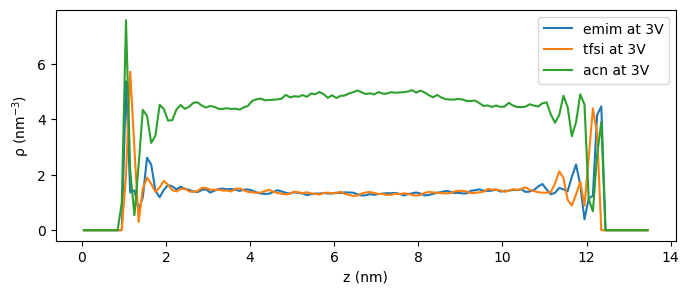

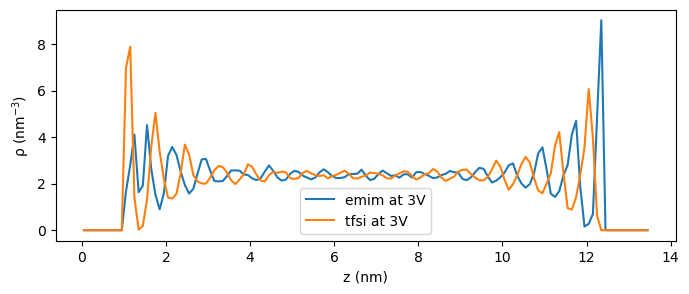

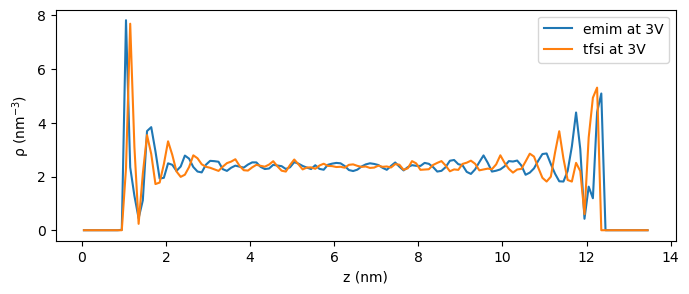

In [11]:
from CPManalysis.density_dist import calc_density_distribution
from CPManalysis.density import find_cdc_boundary

cases, seed, voltage = ['acn_emimtfsi', 'neat_emimtfsi'], 3, 3

for case in cases:
    for range_ in [4000, [0, 4000]]:
        fig, ax = plt.subplots(figsize=(8,3))
        for job in project.find_jobs({'case': case, 'seed': seed, 'voltage': voltage}):
            print(job.id)
            trj_file = os.path.join(job.workspace(), "plane_sample_com_unwrapped.xtc")
            gro_file = os.path.join(job.workspace(), "plane_com.gro")
            trj_total = md.load(trj_file,top = gro_file)
            if case == 'acn_litfsi' or case == 'wat_litfsi':
                
                res_name_list = ['li', 'tfsi']
            else:
                if case == 'neat_emimtfsi':
                    res_name_list = ['emim', 'tfsi']
                elif case == 'acn_emimtfsi':
                    res_name_list = ['emim', 'tfsi', 'acn']
                
            for res_name in res_name_list:
                new_bins, new_hist = calc_density_distribution(trj_total, last_n_frame=range_, res_name = res_name, binwidth = 0.1)
                x = new_bins
                y = new_hist
                ax.plot(x, y, label = "{} at {}V".format(res_name, voltage))
                ax.legend()
                ax.set_xlabel('z (nm)')
                ax.set_ylabel('{} (nm{})'.format('\u03C1', r'$^{-3}$'))